In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import networkx as nx
import random
from sklearn.feature_extraction.text import TfidfVectorizer
from umap.umap_ import UMAP


In [2]:
user_path = 'user_data/2014.csv'
user_data = pd.read_csv(user_path, encoding='ISO-8859-1')
user_data = user_data.drop_duplicates()

freihand_path = 'data/csv/freihand_signatures.csv'
freihand = pd.read_csv(freihand_path)


In [76]:
subject_dict= {'A': 'Manuals', 'B': 'Italian Art', 'C': 'Italian Artists', 'D': 'Rome','E':'Italian Topography', 'F': 'Travel Literature', 
               'G': 'Sources', 'H': 'Iconography', 'J': 'Ornament','K': 'Kat and K', 'L': 'Congress Publications', 'M': 'Art in General',
                'N': 'Architecture', 'O':'Sculpture', 'P': 'Painting', 'Q': 'Manuscript Illumination', 'R': 'Graphic Arts', 
               'S': 'Applied Arts', 'T': 'Collecting Art, Museum Studies', 'U': 'Registers of Artistic Monuments', 'V': 'Cultural Institutions', 
               'W': 'Non-Italian Artists','X': 'European Topography', 'Y': 'World Topography', 'Z': 'Related Disciplines', ' ': 'None'}


custom_colours = ["#EA522B", "#EFD4D1", "#2A4978", "#8BDBE1", "#ECA19D", "#B48E36", "#E1DCE0", "#B8BFCE", "#E0DCD1", "#91C5E4", 
                  "#6E8EAC", "#D2E7E0", "#ECD096", "#6C9686", "#E6E10F", "#9D4B37", "#A3B49D", "#BDC920", "#DBE3E5", "#6A8B8D", "#EFB3D1"]
custom_cmap = ListedColormap(custom_colours)

In [6]:
print('Users in dataset: {}'.format(user_data.Z36H_ID.unique().size))
print('Unique books in dataset: {}'.format(user_data.Z30_CALL_NO.unique().size))
book_counts = user_data.groupby('Z30_CALL_NO')['Z36H_ID'].count()
book_counts.nlargest(5)

Users in dataset: 271
Unique books in dataset: 30163


Z30_CALL_NO
Per B 100-5071      403
Per B 100-5504/a    292
Per K 210-5030      285
Per B 100-5690      245
Per B 100-5756      161
Name: Z36H_ID, dtype: int64

In [21]:
#Join with Freihand dataset to get more info 
merged_df = df.merge(freihand, left_on='Z30_CALL_NO', right_on='signature', how='inner')

#get only english books
eng = merged_df[merged_df.lang == 'eng']

In [36]:
eng.columns

Index(['Z30_CALL_NO', 'Z30_COLLECTION', 'Z30_BARCODE', 'Z30_INVENTORY_NUMBER',
       'Z30_DESCRIPTION', 'Z30_NO_LOANS', 'Z36H_LOAN_DATE',
       'Z36H_RETURNED_DATE', 'Z36H_ID', 'Z36H_LOAN_CATALOGER_NAME',
       'Z13_TITLE', 'bvb', 'title', 'signature', 'inventory_nr',
       'inventory_date', 'inventory_year', 'lang', 'year', 'sys', 'text',
       'text_1', 'text_2', 'text_3', 'sig_lev_1', 'sig_lev_2'],
      dtype='object')

In [22]:
eng

,Z30_CALL_NO,Z30_COLLECTION,Z30_BARCODE,Z30_INVENTORY_NUMBER,Z30_DESCRIPTION,Z30_NO_LOANS,Z36H_LOAN_DATE,Z36H_RETURNED_DATE,Z36H_ID,Z36H_LOAN_CATALOGER_NAME,...,inventory_year,lang,year,sys,text,text_1,text_2,text_3,sig_lev_1,sig_lev_2
5,De 60-6110,BIB,E0040100437711DE,2011.2497,NaN,4,20141027,20141027,MPG000012923,SELFCHECK,...,2011.0,eng,2011.0,De 60,Inschriftensammlungen,Topographie_Rom,Geschichte_und_Kulturgeschichte,NaN,D,De
33,Hd 573-6110,BIB,E0040100438530D3,2012.1581,NaN,8,20140212,20141027,MPG000013093,SELFCHECK,...,2012.0,eng,2011.0,Hd 573,"Neuzeit_(nach_1500),_Italien",Ikonographie,Mythologischer_Themenkreis,Ikonographie_im_Themenbereich_der_griechisch-r...,H,Hd
39,Tm 1135-6120,BIB,E004010043762B20,2012.3143,NaN,3,20140620,20140620,MPG000012870,SELFCHECK,...,2012.0,eng,2012.0,Tm 1135,westeuropäische_Länder,Kunstsammeln_und_Kunstpflege_(ohne_Italien_spe...,"Museums-,_Austellungs-und_Restaurierungswesen",Restaurierungswesen,T,Tm
74,Mb 705-6124,BIB,E004010042E9B8EB,2012.1937,NaN,15,20140207,20140207,MPG000012926,SELFCHECK,...,2012.0,eng,2012.0,Mb 705,Kunst_und_Religion,Kunst_allgemein_(ohne_Italien_speziell),Theoretische_Grundlagen_und_Randgebiete_der_Ku...,Motivgeschichtliche_Monographien,M,Mb
80,Bt 2028-6110,BIB,E004010042E98B25,2012.1313,NaN,10,20140912,20140912,MPG000012881,SELFCHECK,...,2012.0,eng,2011.0,Bt 2028,Wesen_und_Praxis_der_Denkmalpflege,Italienische_Kunst,Kunstsammeln_und_Kunstpflege,"Denkmalpflege,_Kunstschutz_im_Kriege,_Kunstraub",B,Bt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62266,Bb 520-6141,BIB,E004010041AEF52C,2014.3961,NaN,18,20141201,20141201,MPG000013018,SELFCHECK,...,2014.0,eng,2014.0,Bb 520,Kunst_und_Religion,Italienische_Kunst,Kunst_allgemein,sonstige_außereuropäische_Sprachen,B,Bb
62291,Hm 3650-6140,BIB,E004010041AD8341,2014.3693,NaN,8,20141016,20150113,MPG000013483,SELFCHECK,...,2014.0,eng,2014.0,Hm 3650,"Erotik,_Liebespaar,_Hochzeit",Ikonographie,Weltlicher_Themenkreis,Mensch_und_Gesellschaft,H,Hm
62292,Qe 550-6140,BIB,E004010041AD435E,2014.3963,NaN,1,20141103,20150123,MPG000013297,SELFCHECK,...,2014.0,eng,2014.0,Qe 550,karolingische_und_ottonische_Zeit_(9.-10._Jh.),Buchmalerei_(ohne_Italien_speziell),Geschichte_der_Buchmalerei,Technik_der_Buchmalerei,Q,Qe
62293,Qe 550-6140,BIB,E004010041AD435E,2014.3963,NaN,1,20141103,20150123,MPG000013297,SELFCHECK,...,2014.0,eng,2014.0,Qe 550,Amerika,Buchmalerei_(ohne_Italien_speziell),Geschichte_der_Buchmalerei,Technik_der_Buchmalerei,Q,Qe


### Networkx

In [23]:
df = eng

In [24]:
G = nx.Graph()

for _, row in df.iterrows():
    user = row['Z36H_ID']
    book = row['Z30_CALL_NO']

    # Add an edge between books if the same user has read both
    books_read_by_user = df[df['Z36H_ID'] == user]['Z30_CALL_NO'].tolist()
    for other_book in books_read_by_user:
        if book != other_book:
            G.add_edge(book, other_book)


In [31]:
print('number of edges: {}'.format(G.number_of_edges()))
print('number of nodes: {}'.format(G.number_of_nodes()))
      
      

number of edges: 97116
number of nodes: 2271


/var/folders/fs/xb9k_3m95gq0wjgk1kgw1nxr0000gn/T/ipykernel_3125/86672361.py:3: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  random_nodes = random.sample(G.nodes, k=min(num_nodes_to_display, len(G.nodes)))


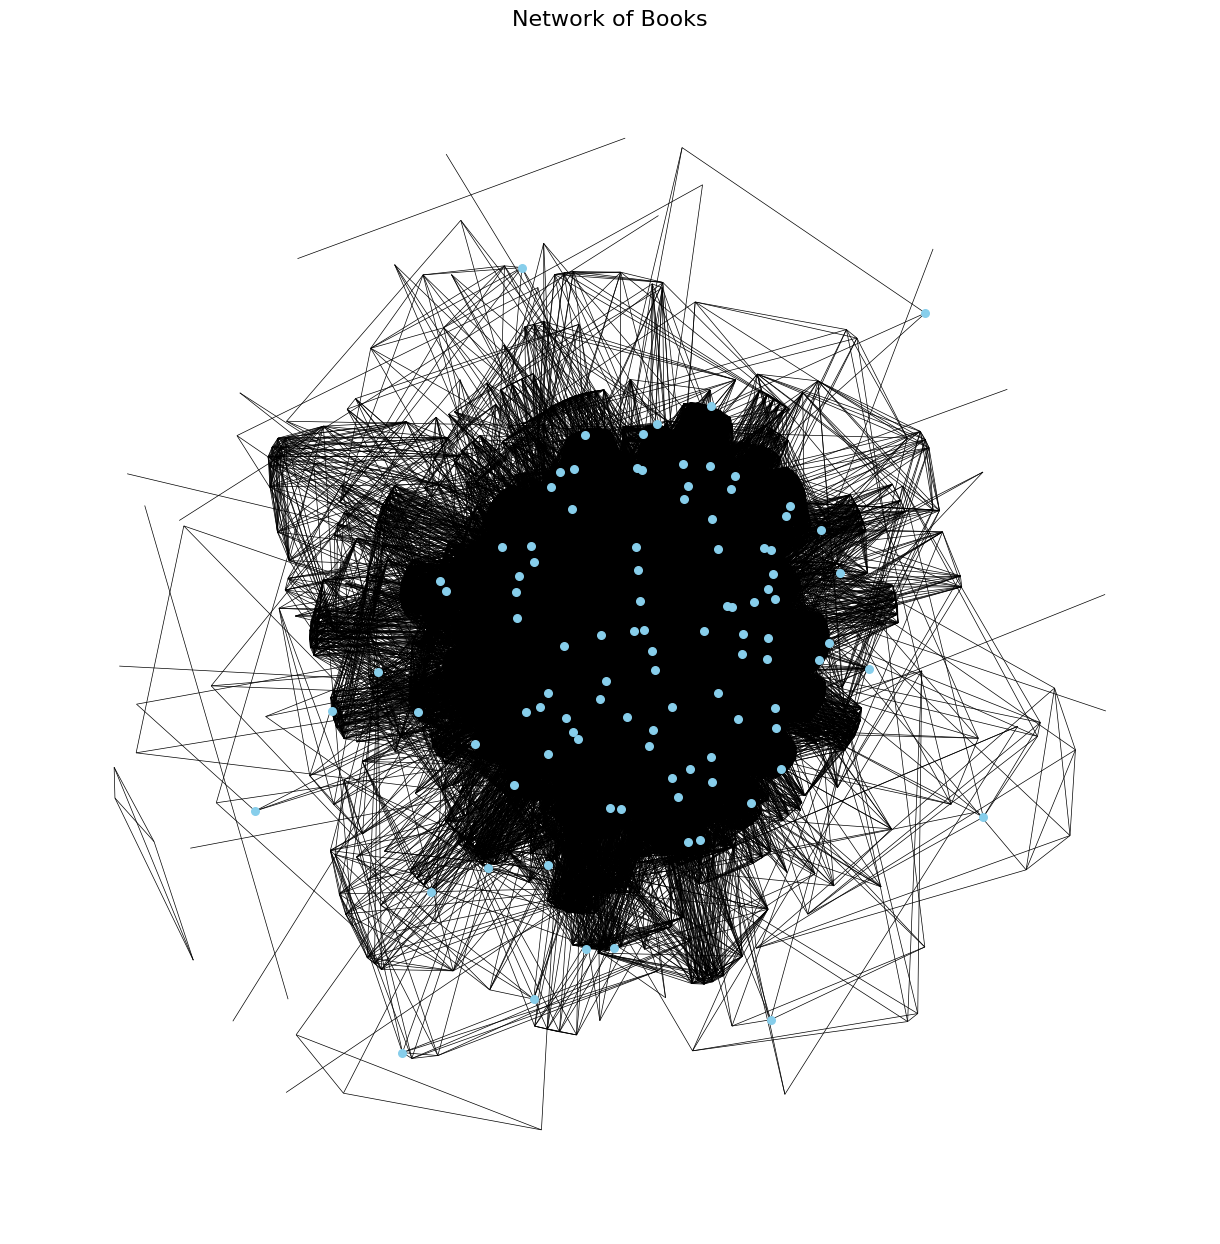

In [29]:
# Reduce the number of nodes for visualization (e.g., take a random subset)
num_nodes_to_display = 100
random_nodes = random.sample(G.nodes, k=min(num_nodes_to_display, len(G.nodes)))

# Customize the layout and appearance
pos = nx.spring_layout(G, seed=42, k=0.25, iterations=50)  # Adjust 'k' and 'iterations' for better dispersion

# Customize node and edge appearance
node_size = 30
edge_width = 0.5

# Visualize the network graph
plt.figure(figsize=(12, 12))  # Adjust the figure size as needed
nx.draw(G, pos, with_labels=False, node_size=node_size, node_color='skyblue', font_color='black', nodelist=random_nodes, width=edge_width)
plt.title("Network of Books", fontsize=16)
plt.axis('off')  # Turn off axis labels
plt.show()

### Use titles and user data for umap

In [80]:
#one hot encode the user data
one_hot_encoded = pd.get_dummies(df[['Z30_CALL_NO', 'Z36H_ID', 'Z13_TITLE', 'sig_lev_1']], columns=['Z36H_ID'])
aggregated = one_hot_encoded.groupby('Z30_CALL_NO').max()

In [81]:
aggregated

,Z13_TITLE,sig_lev_1,Z36H_ID_BHR-100,Z36H_ID_BHR-101,Z36H_ID_BHR-122,Z36H_ID_BHR-135,Z36H_ID_BHR-34,Z36H_ID_BHR-35,Z36H_ID_BHR-36,Z36H_ID_BHR-48,...,Z36H_ID_MPG000013297,Z36H_ID_MPG000013328,Z36H_ID_MPG000013329,Z36H_ID_MPG000013385,Z36H_ID_MPG000013396,Z36H_ID_MPG000013469,Z36H_ID_MPG000013483,Z36H_ID_MPG000013525,Z36H_ID_MPG000013532,Z36H_ID_MPG000013536
Z30_CALL_NO,,,,,,,,,,,,,,,,,,,,,
Aa 234-4850/c1,The dictionary of national biography,A,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Aa 234-4850/c21,The dictionary of national biography,A,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Aa 234-4850/c3,The dictionary of national biography,A,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Aa 234-4850/c4,The dictionary of national biography,A,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Aa 234-4850/c5,The dictionary of national biography,A,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Xy-IST 32-5130 gr,The church of Saint Eirene at Constantinople,X,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Xy-IST 32-5974 gr,Hagia Sophia,X,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Xy-IST 32-5975 gr,Kalenderhane in Istanbul,X,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [82]:
#tf-idf the titles
tf = TfidfVectorizer(analyzer='word', ngram_range=(1,1), stop_words= 'english')
features = tf.fit_transform(aggregated['Z13_TITLE'])

In [87]:
# Concatenate the TF-IDF and one-hot encoded data horizontally
one_hot_data = aggregated.drop(columns=['Z13_TITLE', 'sig_lev_1']).values
combined_data = np.hstack((features.toarray(), one_hot_data))
sig_lev_1_labels = aggregated['sig_lev_1']

In [100]:
umap = UMAP(n_components=2).fit_transform(combined_data)

# Create a mapping from labels to color indices
label_to_color_index = {label: idx for idx, label in enumerate(np.unique(sig_lev_1_labels))}

# Map labels to color indices
color_indices = np.array([label_to_color_index[label] for label in sig_lev_1_labels])



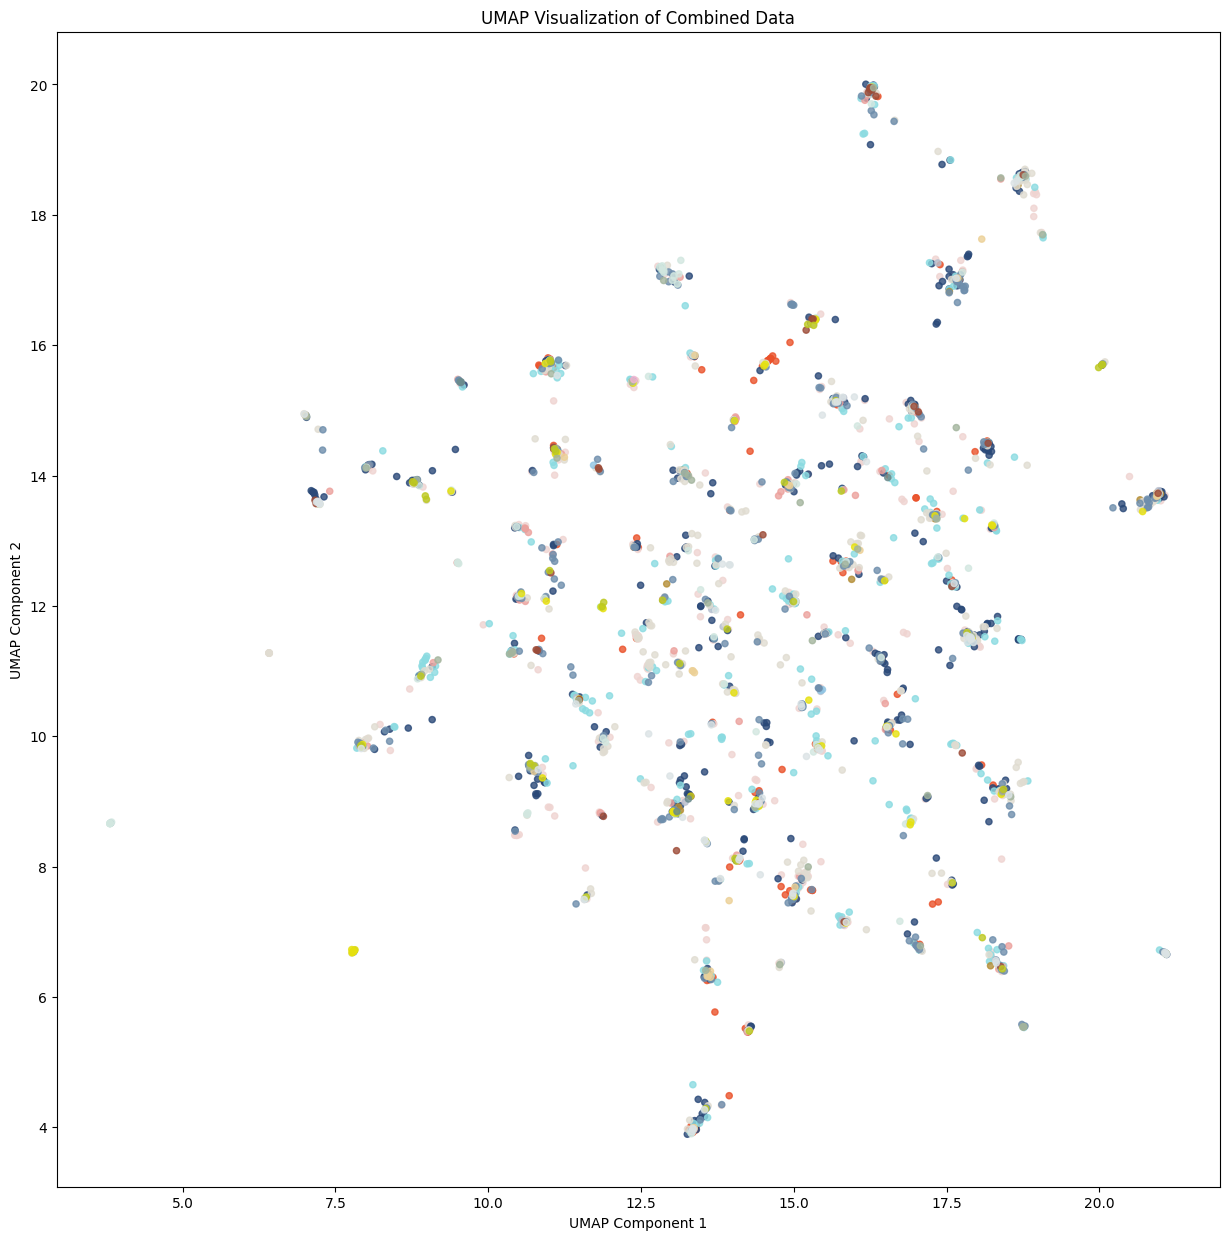

In [103]:
# Create a scatter plot to visualize the reduced-dimensional data
fig, ax = plt.subplots(figsize=(15, 15))

plt.scatter(umap[:, 0], umap[:, 1], s=20, alpha=0.8, c=color_indices, cmap=custom_cmap)
plt.title('UMAP Visualization of Combined Data')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.show()

In [32]:
one_hot_encoded = pd.get_dummies(df, columns=['Z36H_ID'])
aggregated = one_hot_encoded.groupby('Z30_CALL_NO').max()
aggregated.reset_index(inplace=True)



In [33]:
aggregated

,Z30_CALL_NO,Z30_COLLECTION,Z30_BARCODE,Z30_INVENTORY_NUMBER,Z30_DESCRIPTION,Z30_NO_LOANS,Z36H_LOAN_DATE,Z36H_RETURNED_DATE,Z36H_LOAN_CATALOGER_NAME,Z13_TITLE,...,Z36H_ID_MPG000013297,Z36H_ID_MPG000013328,Z36H_ID_MPG000013329,Z36H_ID_MPG000013385,Z36H_ID_MPG000013396,Z36H_ID_MPG000013469,Z36H_ID_MPG000013483,Z36H_ID_MPG000013525,Z36H_ID_MPG000013532,Z36H_ID_MPG000013536
0,Aa 234-4850/c1,BIB,E00401004129A3D9,NaN,NaN,4,20141022,20141022,SELFCHECK,The dictionary of national biography,...,False,False,False,False,False,False,False,False,False,False
1,Aa 234-4850/c21,BIB,E00401004129D2AA,NaN,NaN,1,20141024,20141024,SELFCHECK,The dictionary of national biography,...,False,False,False,False,False,False,False,False,False,False
2,Aa 234-4850/c3,BIB,E004010041299009,NaN,NaN,2,20141022,20141022,SELFCHECK,The dictionary of national biography,...,False,False,False,False,False,False,False,False,False,False
3,Aa 234-4850/c4,BIB,E004010041298F4A,NaN,NaN,3,20141121,20141121,SELFCHECK,The dictionary of national biography,...,False,False,False,False,False,False,False,False,False,False
4,Aa 234-4850/c5,BIB,E004010041298F51,NaN,NaN,2,20140512,20140512,SELFCHECK,The dictionary of national biography,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2274,Xy-IST 32-5130 gr,BIB,E004010041C677B7,NaN,NaN,12,20140314,20140314,SELFCHECK,The church of Saint Eirene at Constantinople,...,False,False,False,False,False,False,False,False,False,False
2275,Xy-IST 32-5974 gr,BIB,E004010041C67B80,1999.1679,NaN,3,20140121,20140122,SELFCHECK,Hagia Sophia,...,False,False,False,False,False,False,False,False,False,False
2276,Xy-IST 32-5975 gr,BIB,E004010041C67B7B,1998.5386,NaN,55,20141028,20141111,SELFCHECK,Kalenderhane in Istanbul,...,False,False,False,False,False,False,False,False,False,False
2277,Xy-IST 32-5975/2 gr,BIB,E004010041C677DA,2008.4054,NaN,9,20141028,20141111,SELFCHECK,Kalenderhane in Istanbul,...,False,False,False,False,False,False,False,False,False,False
